<a href="https://colab.research.google.com/github/Kayumov094/distribution-of-data/blob/main/amaliy_distribution_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 4-MODUL. VIZUALIZASIYA

### 4.6 **Distribution** - taqsimot
Taqsimot grafik - o'zgaruvchi (ustun)da qanday qiymatlar mavjudligi va ularning ehtimolligini ko'rsatuvchi grafik.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns # agar seaborn o'rnatilmagan bo'lsa pip install seaborn

Darsimiz uchun Mercedes-Benz firmasi avtomobillari narxini jamlagan jadvalni yuklab olamiz.

In [9]:
df = pd.read_csv("https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/refs/heads/main/merc.csv")
# df = pd.read_csv("https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/merc.csv")
df=df[df.year>=2010] # 2010-yildan keyin chiqqan mashinalarni saqlab qolamiz
df=df[df.transmission!='Other'] # Faqat avtomat, mexanik va yarim-avtomat mashinalarni olib qolamiz
df=df[df.fuelType!='Other'] # Faqat benzin, dizel va gibrid mashinalarni olib qolamiz
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12990 entries, 1 to 13118
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         12990 non-null  object 
 1   year          12990 non-null  int64  
 2   price         12990 non-null  int64  
 3   transmission  12990 non-null  object 
 4   mileage       12990 non-null  int64  
 5   fuelType      12990 non-null  object 
 6   tax           12990 non-null  int64  
 7   mpg           12990 non-null  float64
 8   engineSize    12990 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1014.8+ KB


Keling jadvaldagi narxlarning taqsimotini ko'ramiz:

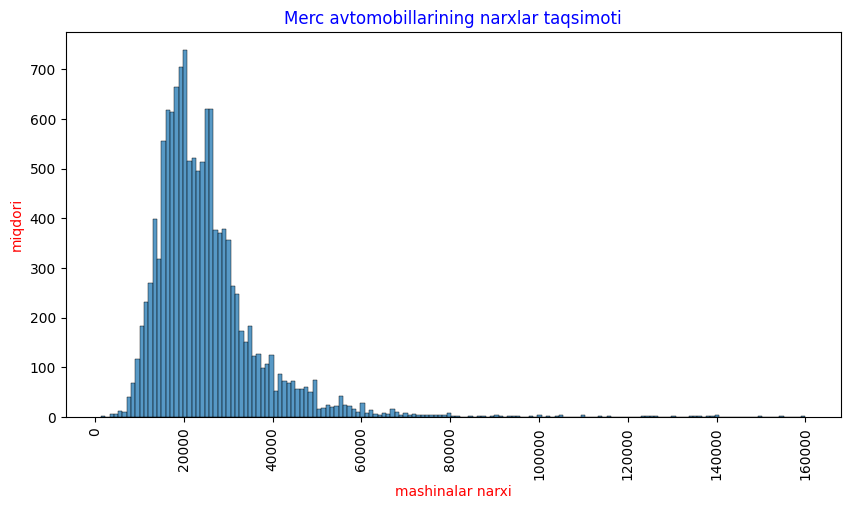

In [11]:
plt.figure(figsize = (10,5))
sns.histplot(data=df, x='price')
plt.xlabel("mashinalar narxi", c = 'r')
plt.ylabel("miqdori", c='r')
plt.title("Merc avtomobillarining narxlar taqsimoti", c='b')
plt.xticks(rotation=90)
plt.show()
# plt.figure(figsize=(10,5))
# sns.histplot(data=df, x='price')
# plt.xticks(rotation=90)
# plt.show()

`seaborn` da taqsimotlarni ko'rsatish uchun bir nechta funksiyalar mavjud.
Yuqorida ko'rganimiz `histplot` shulardan biri. Shuningdek, turli taqsimotlarni jamlaydigan yagona `displot` funksiyasi ham bor.

`displot` yoki `histplot` qay biridan foydalanish sizning o'zingizga bog'liq. Bu ikkisining fariq shundaku, `histplot` va biz pastroqda ko'radigan `kdeplot`,  `ecdfplot` funksiyalari yordamida chizmaga ko'proq o'zgartirishlar kiritish mumkin.

Batafsil: https://seaborn.pydata.org/generated/seaborn.displot.html

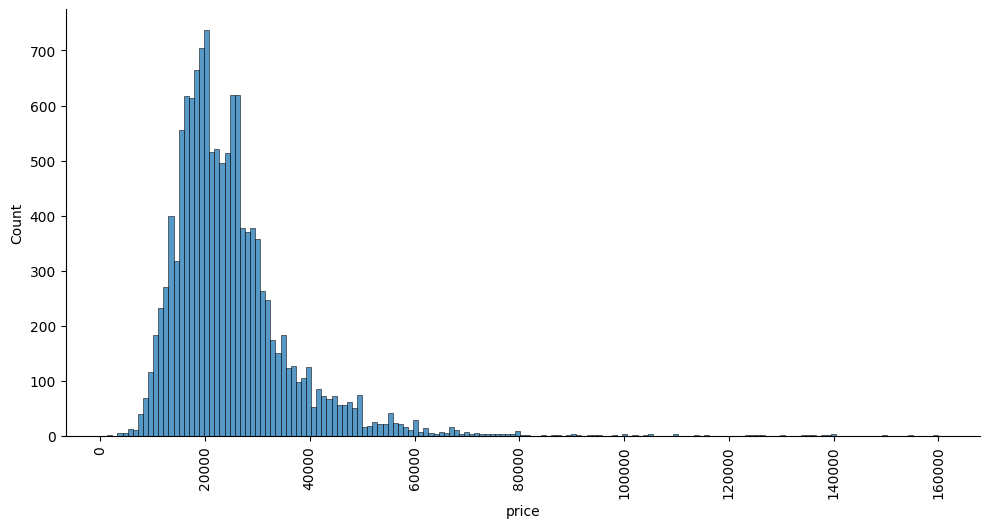

In [44]:
sns.displot(data=df, x='price', height=5, aspect=2,bins="auto")
plt.xticks(rotation=90)
plt.show()

# sns.displot(data=df, x='price', height=5, aspect=2)
# plt.xticks(rotation=90)
# plt.show()

Yuqoridagi grafikdan aksar mashinalarning narxi 20000$ ga yaqi ekanini ko'rishimiz mumkin.

Keling jadvaldagi mashinalarning kilometri taqsimotini ko'ramiz:

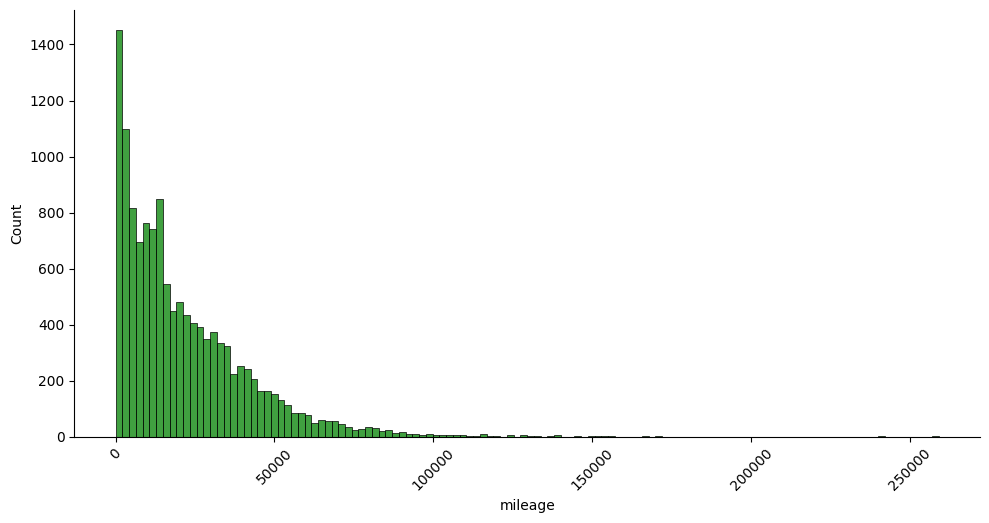

In [41]:
sns.displot(data=df, x='mileage', height=5, aspect=2, color='green')
plt.xticks(rotation=45)
plt.show()

# sns.displot(data=df, x='mileage', height=5, aspect=2)
# plt.xticks(rotation=90)
# plt.show()

Qo'shimcha parametr

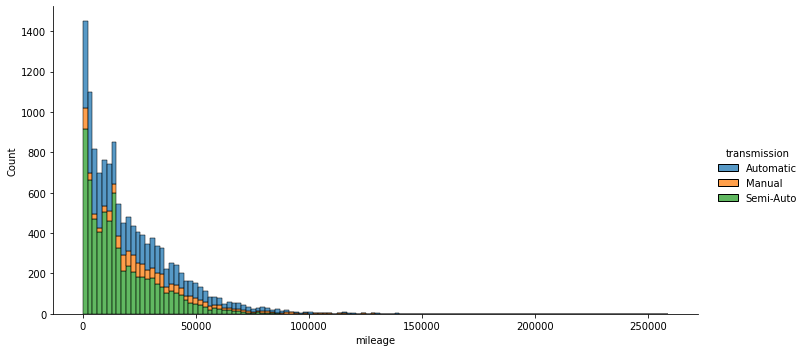

In [ ]:
sns.displot(data=df, x="mileage", hue="transmission", multiple="stack", height=5, aspect=2)
plt.show()

`col` parametri yordamida har bir grafikni ajratib chizish mumkin:

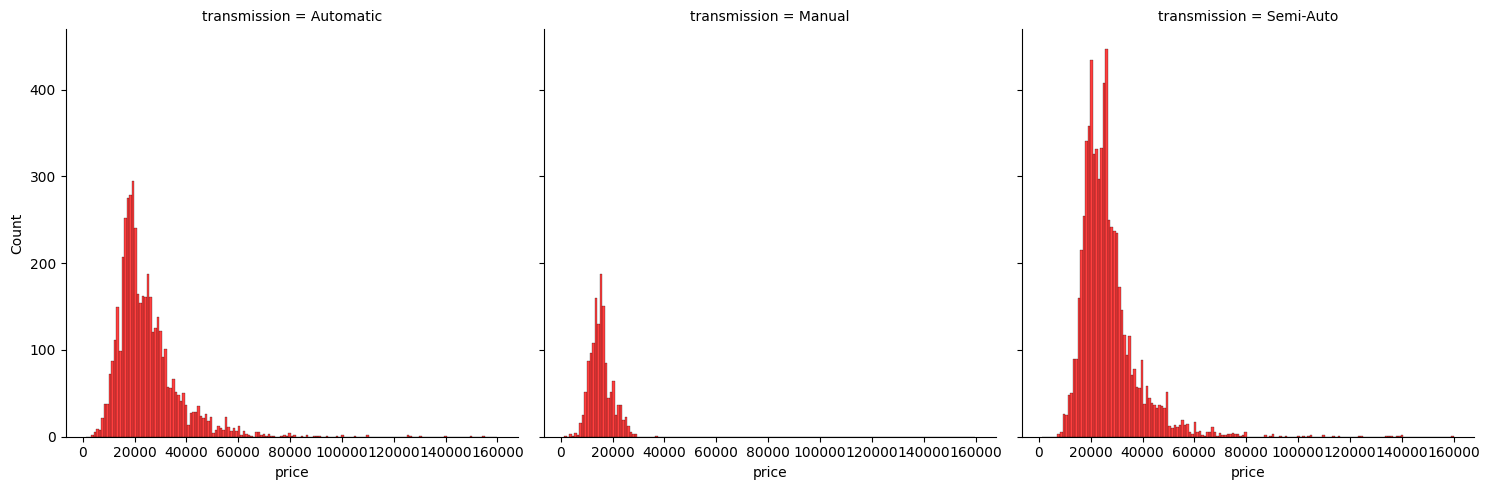

In [30]:
sns.displot(data=df, x="price", col="transmission", height=5, aspect=1, color='r')
plt.show()

### KDE - Kernel Density Estimation
Qiymatlar taqsimotini baholashning yana bir usuli bu - KDE, tasodifiy qiymatlar zichligini ko'rsatuvchi grafik.
KDE haqida to'liq ma'lumot: https://en.wikipedia.org/wiki/Kernel_density_estimation (rus tilida ham bor)

KDE grafik uchun `displot` yoki maxsus `kdeplot` funksiylaridan foydalanishimiz mumkin:

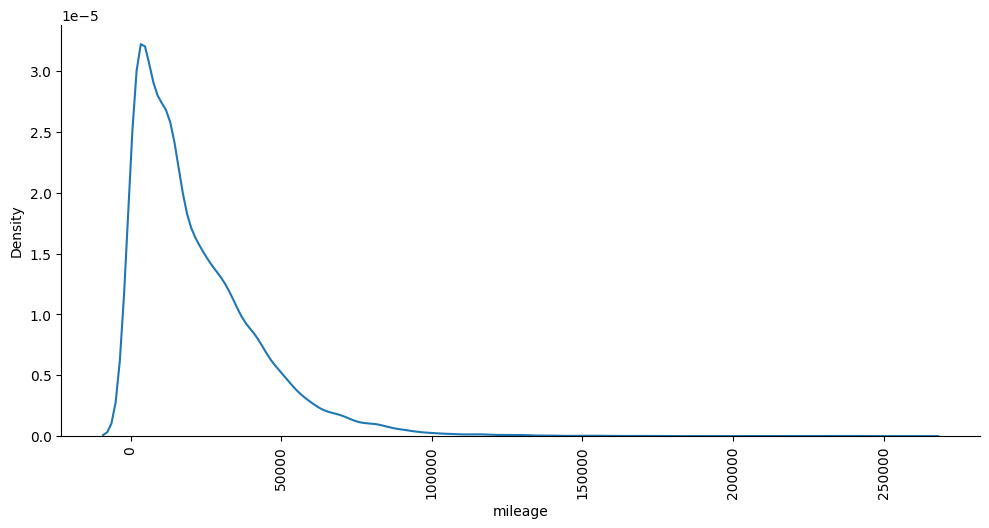

In [36]:
#displot
sns.displot(data=df, x='mileage', kind='kde', height=5, aspect=2) # height va aspect grafik hajmini berish uchun
plt.xticks(rotation=90)
plt.show()

`displot` yordamida Distribution va KDE jamlab chizish ham mumkin:

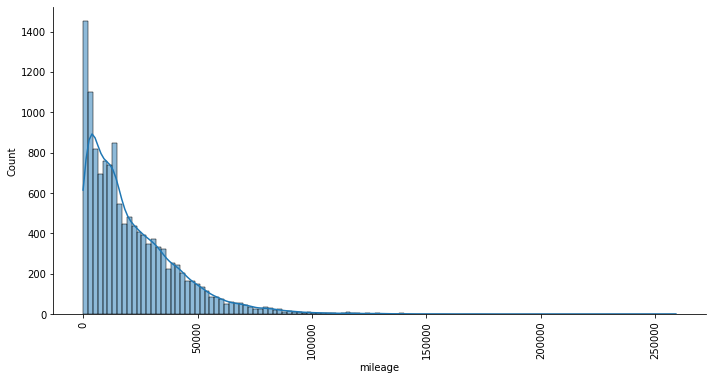

In [ ]:
sns.displot(data=df, x='mileage', kde=True, height=5, aspect=2)
plt.xticks(rotation=90)
plt.show()

### `kdeplot()`

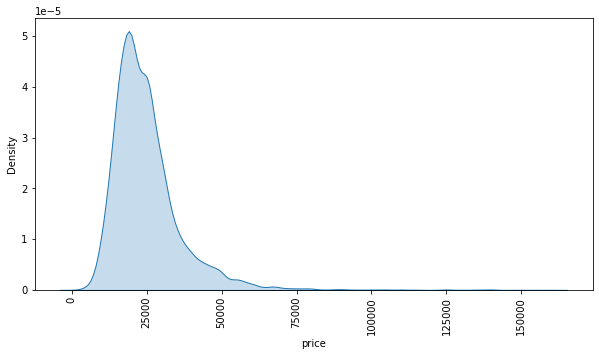

In [ ]:
#kdeplot
plt.figure(figsize=(10,5))
sns.kdeplot(data=df, x='price', shade=True)
plt.xticks(rotation=90)
plt.show()

`hue` parametri yordamida qo'shimcha o'zgaruvchini qo'shishimiz mumkin:

<ipython-input-37-c4787f96f8d7>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='price', hue='transmission', shade=False)


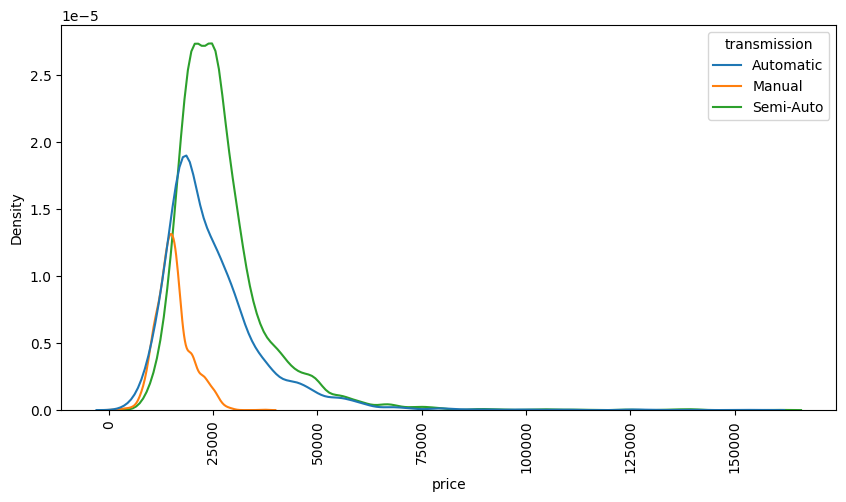

In [37]:
#kdeplot
plt.figure(figsize=(10,5))
sns.kdeplot(data=df, x='price', hue='transmission', shade=False)
plt.xticks(rotation=90)
plt.show()

`displot` va `hue`

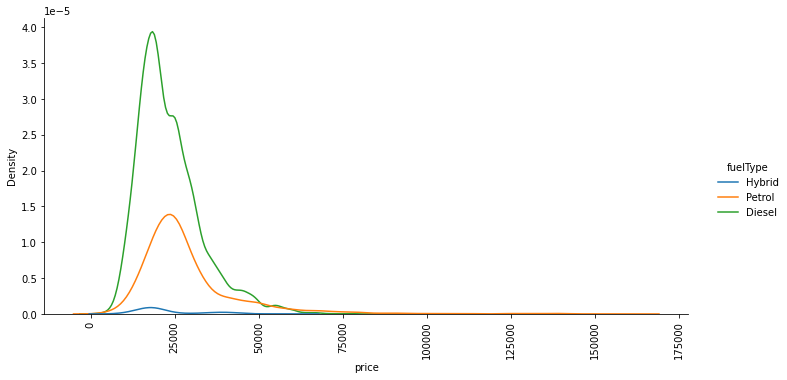

In [ ]:
sns.displot(data=df, x='price', hue='fuelType', kind='kde', height=5, aspect=2)
plt.xticks(rotation=90)
plt.show()

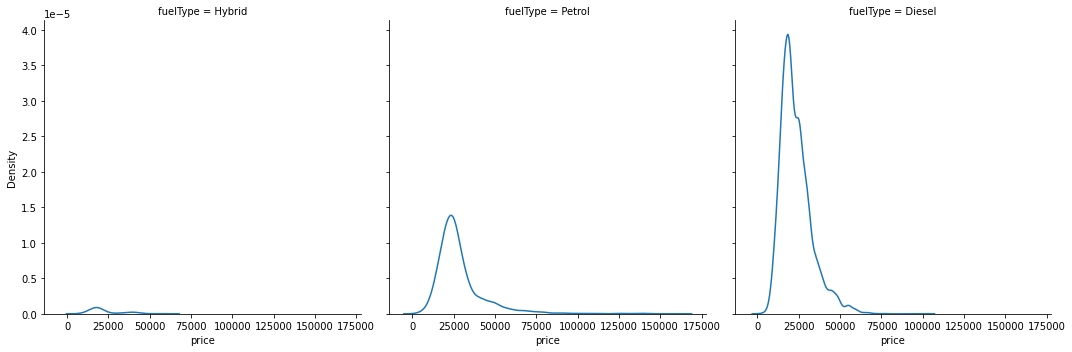

In [ ]:
sns.displot(data=df, x="price", col="fuelType", kind='kde', height=5, aspect=1)
plt.show()

### Ikki o'lchamli (2D) KDE

In [ ]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0
5,SL CLASS,2011,149948,Automatic,3000,Petrol,570,21.4,6.2


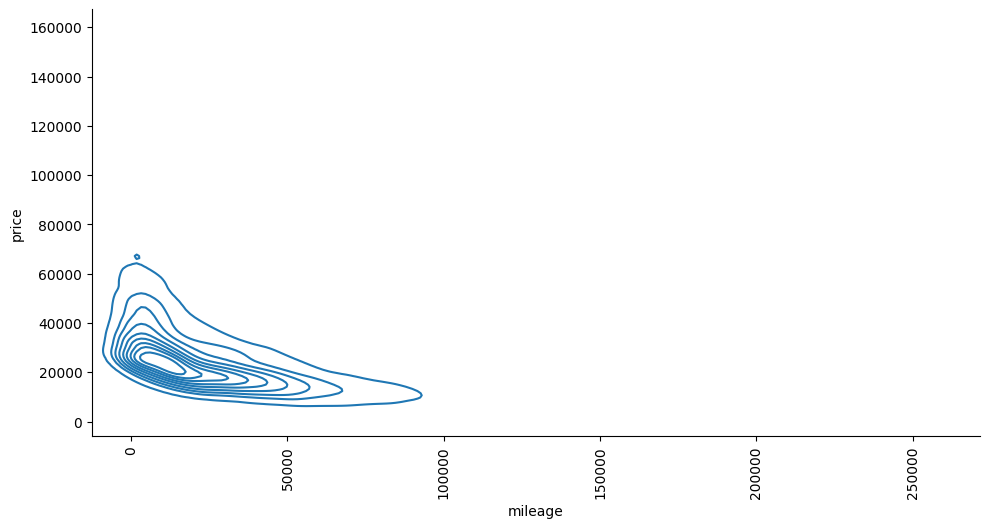

In [39]:
sns.displot(data=df, x="mileage", y="price", kind="kde", height=5, aspect=2)
plt.xticks(rotation=90)
plt.show()

## CDF - cumulative distribution function
Kumulyativ taqsimot funksiyasi - berilgan qiymatning ehtimolligini ko'rsatuvchi parametr.

To'liq: https://en.wikipedia.org/wiki/Cumulative_distribution_function

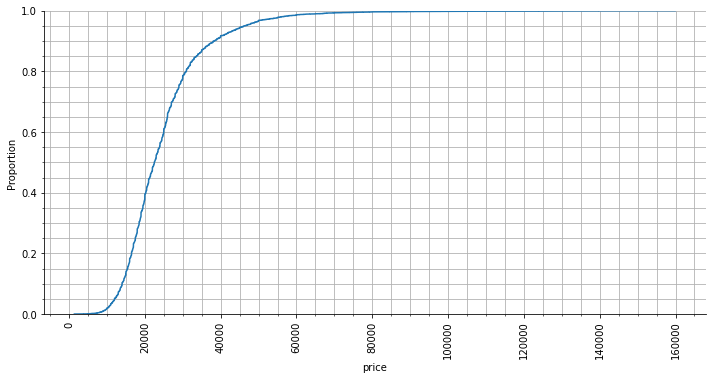

In [ ]:
sns.displot(data=df, x="price", kind="ecdf", height=5, aspect=2)
plt.xticks(rotation=90)
plt.grid(which='both') # setka (major, minor, both) qiymatlarini berib ko'ring
plt.minorticks_on()
plt.show()

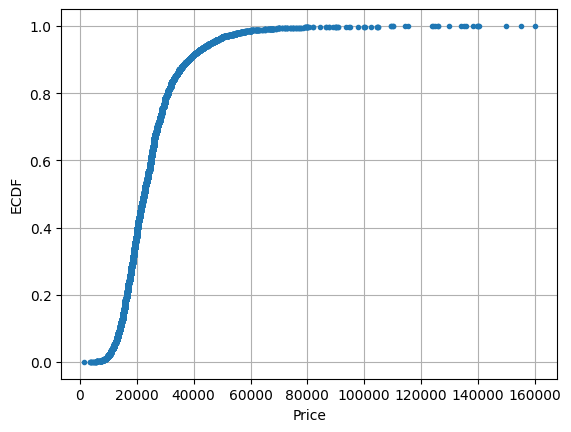

In [32]:
import numpy as np
import matplotlib.pyplot as plt

data = df['price'].sort_values()
ecdf = np.arange(1, len(data)+1) / len(data)

plt.plot(data, ecdf, marker='.', linestyle='none')
plt.xlabel('Price')
plt.ylabel('ECDF')
plt.grid()
plt.show()

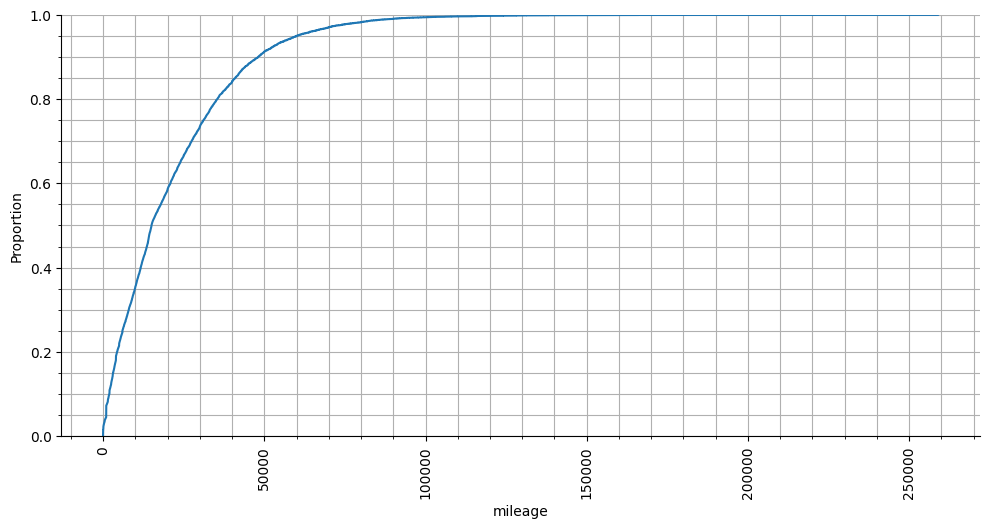

In [35]:
sns.displot(data=df, x="mileage", kind="ecdf", height=5, aspect=2)
plt.xticks(rotation=90)
plt.grid(which='both') # setka (major, minor, both) qiymatlarini berib ko'ring
plt.minorticks_on()
plt.show()

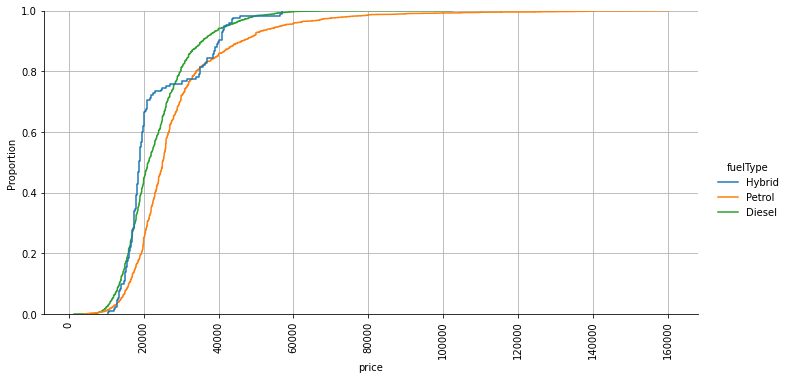

In [ ]:
sns.displot(data=df, x="price", hue="fuelType", kind="ecdf", height=5, aspect=2)
plt.xticks(rotation=90)
plt.grid()
plt.show()

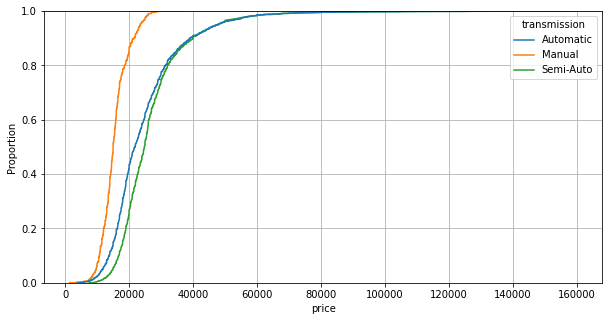

In [ ]:
plt.figure(figsize=(10,5))
sns.ecdfplot(data=df, x="price", hue="transmission")
plt.grid()
plt.show()

### displot haqida batafsil: https://seaborn.pydata.org/generated/seaborn.displot.html